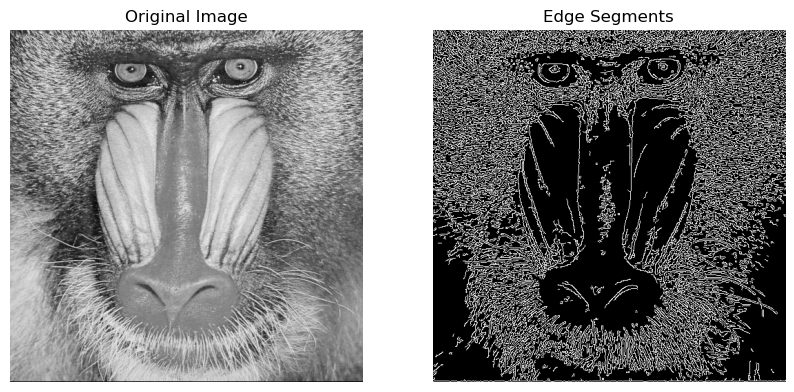

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def count_transitions(edge_image, i, j):
    directions = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    count = 0
    for direction in directions:
        y, x = i + direction[0], j + direction[1]
        if edge_image[y, x] == 1:
            count += 1
    return count

def edge_segment_detection(edge_image):
    M, N = edge_image.shape
    Q = deque()
    visited = np.zeros((M, N), dtype=int)
    segments = []
    
    directions = [(0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1), (-1, 0), (-1, 1)]
    
    for i in range(1, M-1):
        for j in range(1, N-1):
            transition_count = count_transitions(edge_image, i, j)
            if transition_count == 1 or transition_count >= 3:
                for dir in range(8):
                    y, x = i + directions[dir][0], j + directions[dir][1]
                    if edge_image[y, x] == 1:
                        Q.append((i, j, dir))
    
    n = 0
    while Q:
        y, x, dir = Q.popleft()
        cy, cx = y + directions[dir][0], x + directions[dir][1]
        if visited[cy, cx] == 1:
            continue
        n += 1
        segment = [(y, x), (cy, cx)]
        visited[y, x] = visited[cy, cx] = 1
        if (cy, cx) in Q:
            continue
        while True:
            forward_pixel = (cy + directions[dir][0], cx + directions[dir][1])
            y, x = forward_pixel
            if visited[y, x] == 1:
                continue
            if count_transitions(edge_image, cy, cx) == 1:
                segment.append((y, x))
                visited[y, x] = 1
                break
            else:
                for dir in range(8):
                    y, x = cy + directions[dir][0], cx + directions[dir][1]
                    if edge_image[y, x] == 1:
                        segment.append((y, x))
                        break
        segments.append(segment)
    
    return segments

# Load image using OpenCV
image_path = './image/babbon.bmp'  # 이미지 경로를 적절히 수정하세요
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply edge detection (e.g., Canny edge detector)
edges = cv2.Canny(image, 100, 200)

# Perform edge segment detection
segments = edge_segment_detection(edges)

# Plot the results using matplotlib
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Edge Segments")
plt.imshow(edges, cmap='gray')
for segment in segments:
    ys, xs = zip(*segment)
    plt.plot(xs, ys, 'r-')
plt.axis('off')

plt.show()
